In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [67]:
def f_wb(x, w, b) -> float:
    return 1.0 * w * x + b

In [68]:
def J_wb(w, b, data_x, data_y):
    if(len(data_x) != len(data_y)):
        raise RuntimeError("data_x and data_y must be the same length")

    m = len(data_x)

    sum = 0
    for i in range(m):
        sum += pow(f_wb(data_x[i], w, b) - data_y[i], 2)

    return 1.0 / (2.0 * m) * sum


In [69]:
def f_w(x, w):
    return 1.0 * w * x

In [70]:
def J_w(w, data_x, data_y):
    if(len(data_x) != len(data_y)):
        raise RuntimeError("data_x and data_y must be the same length")
    
    m = len(data_x)

    sum = 0
    for i in range(m):
        sum += pow(f_w(data_x[i], w) - data_y[i], 2)

    return (1.0 / (2.0 * m)) * sum

In [71]:
def dJ_w(w, data_x, data_y):
    m = len(data_x)

    sum = 0
    for i in range(m):
        sum += (f_w(data_x[i], w) - data_y[i]) * data_x[i]

    return (1 / (2.0 * m)) * sum


In [72]:
def gradiant_descent(w, a, calibration, data_x, data_y):
    deriv = dJ_w(w, data_x, data_y) 

    steps = 0
    temp_ws = [] 
    while abs(deriv) > calibration:
        deriv = dJ_w(w, data_x, data_y)
        w = w - a * deriv
        steps += 1
        if(steps % 10 == 0):
            temp_ws.append(w)
        
    print("Steps: ", steps)
    print("Temp w: ", temp_ws)
    
    return w, np.array(temp_ws)

In [82]:
# x = np.array([1, 2, 3, 4, 5])
# y = np.array([4.5, 7.2, 9.1, 10.8, 13.5])

x = np.array([1, 2, 3, 4, 5])
y = x * 5

In [86]:
w, temp_ws = gradiant_descent(10, 0.01, 0.001, x, y)
y_pred = x * w 

temp_y_preds = np.zeros((len(temp_ws), len(x)))
for i, temp_w in enumerate(temp_ws):
    temp_y_preds[i] = x * temp_w


print("w:", w)

Steps:  182
Temp w:  [np.float64(7.83980218776015), np.float64(6.612895293121467), np.float64(5.916060716406879), np.float64(5.5202862453146775), np.float64(5.295502003541228), np.float64(5.1678334472287775), np.float64(5.095322758123922), np.float64(5.05413955541273), np.float64(5.030749125581087), np.float64(5.017464286819376), np.float64(5.009919023983467), np.float64(5.005633613201739), np.float64(5.003199669419059), np.float64(5.00181728564327), np.float64(5.001032146349108), np.float64(5.0005862182920575), np.float64(5.000332948797659), np.float64(5.000189101744801)]
w: 5.00016887258565


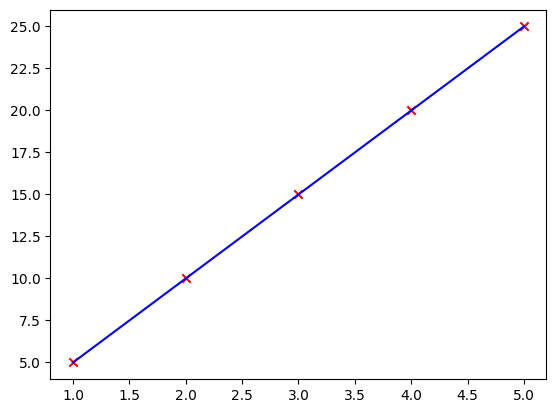

In [87]:
plt.scatter(x, y, marker='x', c="r")
plt.plot(x, y_pred, color="blue")
plt.show()

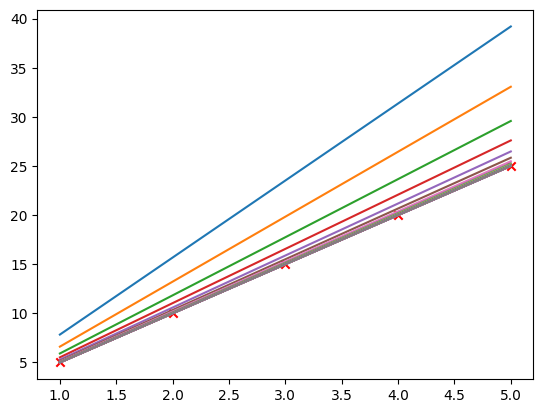

In [88]:
plt.scatter(x, y, marker='x', c="r")
plt.plot(x, y_pred, color="blue")
for temp_y in temp_y_preds:
    plt.plot(x, temp_y)
plt.show()
